##### SVM

sci-kitlearn의 SVM 모델 중 SVC 알고리즘이 제공하는 커널

    - linear, 
    - poly, 
    - rbf

In [4]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import timeit
import warnings

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier


warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
t0 = timeit.default_timer()

# We use SAGA solver
solver = "saga"

In [5]:

# Turn down for faster run time
n_samples = 5000

X, y = fetch_20newsgroups_vectorized(subset="all", return_X_y=True)

print(X.shape)
print(y.shape)


(18846, 130107)
(18846,)


In [6]:
X = X[:n_samples]
y = y[:n_samples]

In [7]:
y


array([17,  7, 10, ...,  8, 18, 10])

In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y, test_size=0.1
)
train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print(
    "Dataset 20newsgroup, train_samples=%i, n_features=%i, n_classes=%i"
    % (train_samples, n_features, n_classes)
)

Dataset 20newsgroup, train_samples=4500, n_features=130107, n_classes=20


[model=One versus Rest, solver=saga] Number of epochs: 1
[model=One versus Rest, solver=saga] Number of epochs: 2
[model=One versus Rest, solver=saga] Number of epochs: 3
Test accuracy for model ovr: 0.5960
% non-zero coefficients for model ovr, per class:
 [0.26593496 0.43348936 0.26362917 0.31973683 0.37815029 0.2928359
 0.27054655 0.62717609 0.19522393 0.30897646 0.34586917 0.28207552
 0.34125758 0.29898468 0.34279478 0.59489497 0.38353048 0.35278655
 0.19829832 0.14603365]
Run time (3 epochs) for model ovr:0.83
[model=Multinomial, solver=saga] Number of epochs: 1
[model=Multinomial, solver=saga] Number of epochs: 2
[model=Multinomial, solver=saga] Number of epochs: 5
Test accuracy for model multinomial: 0.6440
% non-zero coefficients for model multinomial, per class:
 [0.36047253 0.1268187  0.10606655 0.17985197 0.5395559  0.07993421
 0.06686804 0.21443888 0.11528972 0.2075215  0.10914094 0.11144673
 0.13988486 0.09684337 0.26286057 0.11682692 0.55800226 0.17370318
 0.11452112 0.14

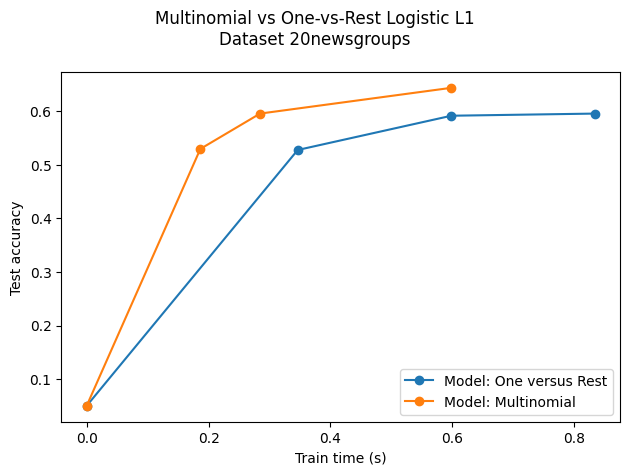

In [6]:

models = {
    "ovr": {"name": "One versus Rest", "iters": [1, 2, 3]},
    "multinomial": {"name": "Multinomial", "iters": [1, 2, 5]},
}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params["iters"]:
        print(
            "[model=%s, solver=%s] Number of epochs: %s"
            % (model_params["name"], solver, this_max_iter)
        )
        clf = LogisticRegression(
            solver=solver,
            penalty="l1",
            max_iter=this_max_iter,
            random_state=42,
        )
        if model == "ovr":
            clf = OneVsRestClassifier(clf)
        t1 = timeit.default_timer()
        clf.fit(X_train, y_train)
        train_time = timeit.default_timer() - t1

        y_pred = clf.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        if model == "ovr":
            coef = np.concatenate([est.coef_ for est in clf.estimators_])
        else:
            coef = clf.coef_
        density = np.mean(coef != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]["times"] = times
    models[model]["densities"] = densities
    models[model]["accuracies"] = accuracies
    print("Test accuracy for model %s: %.4f" % (model, accuracies[-1]))
    print(
        "%% non-zero coefficients for model %s, per class:\n %s"
        % (model, densities[-1])
    )
    print(
        "Run time (%i epochs) for model %s:%.2f"
        % (model_params["iters"][-1], model, times[-1])
    )

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]["name"]
    times = models[model]["times"]
    accuracies = models[model]["accuracies"]
    ax.plot(times, accuracies, marker="o", label="Model: %s" % name)
    ax.set_xlabel("Train time (s)")
    ax.set_ylabel("Test accuracy")
ax.legend()
fig.suptitle("Multinomial vs One-vs-Rest Logistic L1\nDataset %s" % "20newsgroups")
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [8]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

X, y = make_classification(n_samples=10_000, weights=[0.9, 0.1], random_state=0)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
X_train.shape

(7500, 20)

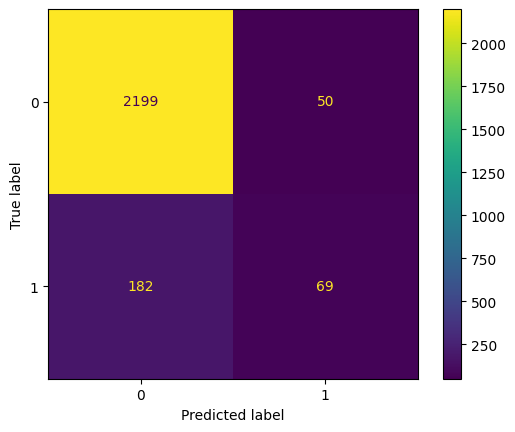

In [13]:

classifier_05 = LogisticRegression(C=1e6, random_state=0).fit(X_train, y_train)
_ = ConfusionMatrixDisplay.from_estimator(classifier_05, X_test, y_test)

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [15]:
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)


In [20]:
X_train.shape

(75, 20)

In [17]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

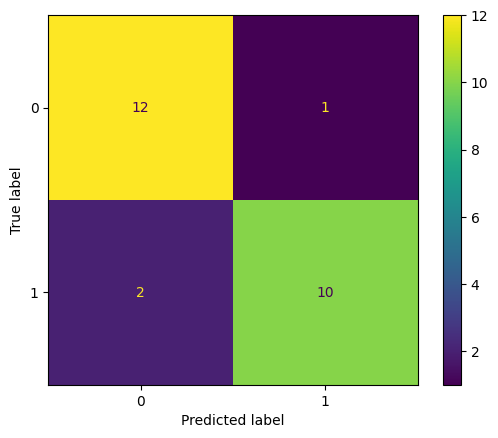

In [18]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()